In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_1 = pd.read_csv('../data/jigsaw-toxic-comment-train.csv', usecols=['comment_text', 'toxic'])
train_2 = pd.read_csv('../data/jigsaw-unintended-bias-train.csv', usecols=['comment_text', 'toxic'])

In [4]:
display(train_1)
display(train_2)

,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
223544,":Jerome, I see you never got around to this…! ...",0
223545,==Lucky bastard== \n http://wikimediafoundatio...,0
223546,==shame on you all!!!== \n\n You want to speak...,0
223547,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1


,comment_text,toxic
0,"This is so cool. It's like, 'would you want yo...",0.000000
1,Thank you!! This would make my life a lot less...,0.000000
2,This is such an urgent design problem; kudos t...,0.000000
3,Is this something I'll be able to install on m...,0.000000
4,haha you guys are a bunch of losers.,0.893617
...,...,...
1902189,He should lose his job for promoting mis-infor...,0.000000
1902190,"""Thinning project is meant to lower fire dange...",0.166667
1902191,I hope you millennials are happy that you put ...,0.400000
1902192,I'm thinking Kellyanne Conway (a.k.a. The Trum...,0.000000


In [5]:
train_1.toxic.value_counts()

0    202165
1     21384
Name: toxic, dtype: int64

In [6]:
train_2.toxic.round().astype(int).value_counts()

0    1789968
1     112226
Name: toxic, dtype: int64

In [7]:
np.sum(np.array(train_2.toxic.values >= 0.5)), np.sum(np.array(train_2.toxic.values < 0.45))

(152111, 1746047)

In [8]:
train_2.toxic = train_2.toxic.round().astype(int)
n = train_2.toxic.sum()
train_1 = pd.concat([train_1, train_2.query('toxic == 1'), train_2.query('toxic == 0').sample(n = n)])

<AxesSubplot:>

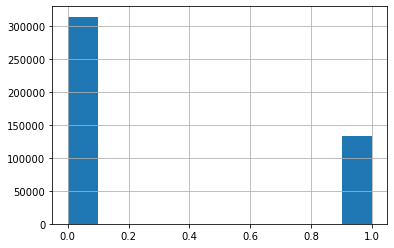

In [14]:
train_1.toxic.hist()